#**Diamond Price Prediction with Classifiers and Regressors**

Welcome to the **ACM W** Workshop on Machine Learning!

I’m ***Sneha Cenoy***, and I'm excited to take you on an exhilarating journey into the world of ML in Python.

Together, we’ll explore how to predict diamond prices while diving into data visualization, classifiers, and regressors. Get ready to unlock insights and ignite your creativity—let's shine bright like diamonds!

# **Step 1: Set up and Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, confusion_matrix, r2_score,ConfusionMatrixDisplay,accuracy_score, classification_report


# **Step 2: Preprocess the Data (Applies to Both Models)**

This step involves cleaning and preparing the dataset:

**Dropping Missing Values:** Removes any rows with missing data to ensure a complete dataset.

**Encoding Categorical Variables**: Converts categorical features ('cut', 'color', 'clarity') into numeric codes for model compatibility.

In [ ]:
# Load and preview the data
#df = pd.read_csv('diamonds.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Pratik94229/Diamond-Price-Prediction-End-to-End-Project/refs/heads/main/notebook/data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
# Data preprocessing: Handle missing values, encoding
df = df.dropna()  # Drop missing values
df = df.drop('id', axis=1) # Drop id column
df['cut'] = df['cut'].astype('category').cat.codes
df['color'] = df['color'].astype('category').cat.codes
df['clarity'] = df['clarity'].astype('category').cat.codes

# **Step 3: Correlation Heatmap**
This heatmap will help visualize correlations between features, assisting in feature selection or understanding multicollinearity.

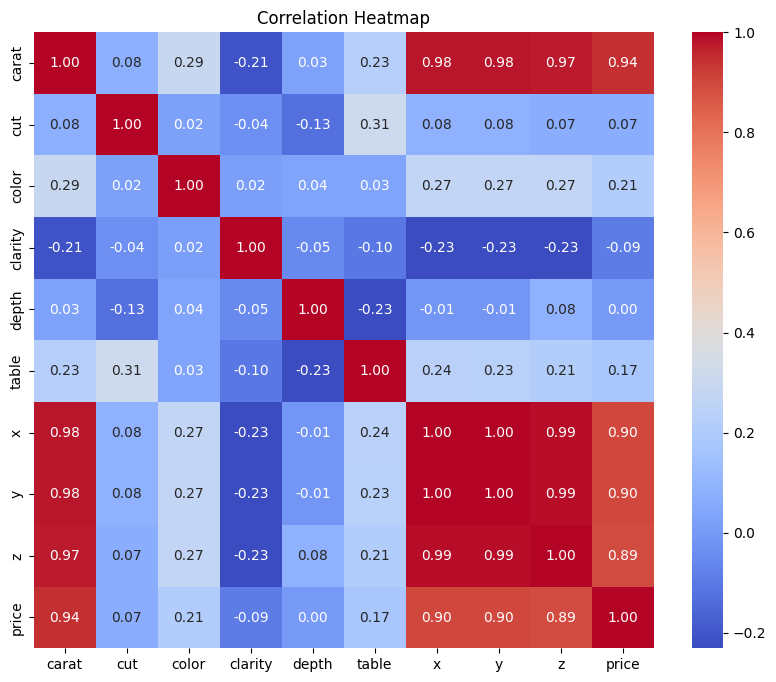

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Step 5: Regression Models (Predicting Exact Price)**
In this step, we use regression models to predict the diamond price, a continuous variable, based on features like carat, cut, and clarity.

To evaluate these models, we’ll use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to measure prediction accuracy.

In [ ]:
# Basic data preprocessing (replace 'feature_columns' with actual feature column names)
X = df[['carat', 'cut', 'color','clarity','depth','table','x','y','z' ]]  # Select relevant features
y = df['price']  # Target variable (price)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2, y_pred

# Initialize dictionary to store results
results = {}

**Linear Regression**: Fits a straight line to capture the relationship between features and price.

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
mae, mse, rmse, r2, y_pred_lr = evaluate_model(lr_model, X_test, y_test)
results['Linear Regression'] = (mae, mse, rmse, r2)

**Decision Tree Regressor**: Splits data into branches to capture non-linear relationships.

In [ ]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
mae, mse, rmse, r2, y_pred_dt = evaluate_model(dt_model, X_test, y_test)
results['Decision Tree'] = (mae, mse, rmse, r2)

**Random Forest Regressor**: An ensemble of decision trees, improves accuracy and reduces overfitting.

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
mae, mse, rmse, r2, y_pred_rf = evaluate_model(rf_model, X_test, y_test)
results['Random Forest'] = (mae, mse, rmse, r2)

**Gradient Boosting Regressor**: Sequentially improves the model by correcting previous errors.

In [ ]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
mae, mse, rmse, r2, y_pred_gb = evaluate_model(gb_model, X_test, y_test)
results['Gradient Boosting'] = (mae, mse, rmse, r2)

# **Step 6: Evaluation Metrics for Regression Models**

In this step, we evaluate the performance of each regression model using the following metrics:

**Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual prices. Lower values indicate better accuracy.

**Mean Squared Error (MSE)**: Calculates the average of the squared differences between predicted and actual prices. It penalizes larger errors more heavily, with lower values representing better performance.

**Root Mean Squared Error (RMSE)**: The square root of MSE, providing error in the same units as the target variable. It highlights larger errors and lower values indicate better fit.

**R² Score (Coefficient of Determination):** Represents the proportion of variance in the target variable explained by the model. Ranges from 0 to 1, with values closer to 1 indicating a better fit.

These metrics help us assess how well each model predicts diamond prices.

In [ ]:
# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MAE: {metrics[0]:.2f}")
    print(f"  MSE: {metrics[1]:.2f}")
    print(f"  RMSE: {metrics[2]:.2f}")
    print(f"  R2 Score: {metrics[3]:.2f}")
    print("-" * 30)

Linear Regression:
  MAE: 706.83
  MSE: 1210982.45
  RMSE: 1100.45
  R2 Score: 0.93
------------------------------
Decision Tree:
  MAE: 423.77
  MSE: 705023.67
  RMSE: 839.66
  R2 Score: 0.96
------------------------------
Random Forest:
  MAE: 309.66
  MSE: 370538.35
  RMSE: 608.72
  R2 Score: 0.98
------------------------------
Gradient Boosting:
  MAE: 352.33
  MSE: 422970.32
  RMSE: 650.36
  R2 Score: 0.97
------------------------------


# **Step 7: Scatter Plot for Actual vs. Predicted Prices**

This code creates a scatter plot comparing actual and predicted diamond prices from two models: Random Forest (blue dots) and Gradient Boosting (green dots). A red dashed line shows where predicted values equal actual values. This visualization helps assess model performance.

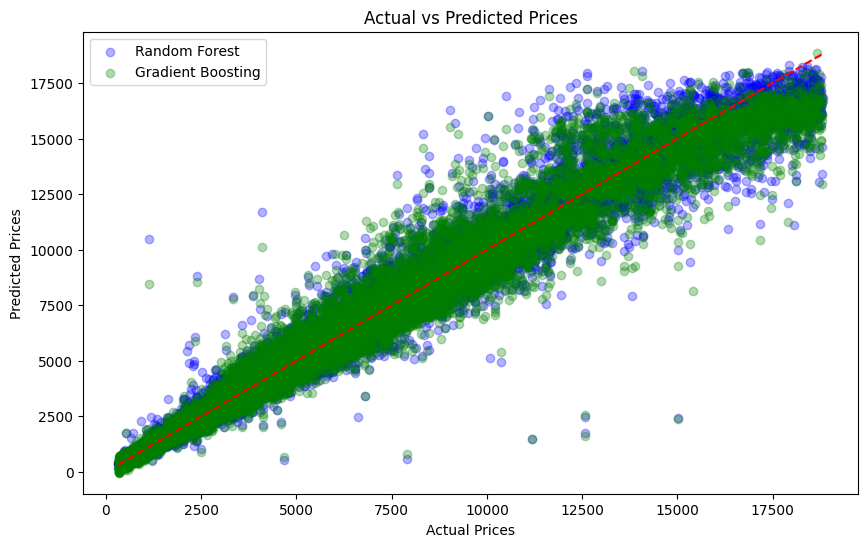

In [ ]:
# Scatter Plot for Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color="b", label="Random Forest")
plt.scatter(y_test, y_pred_gb, alpha=0.3, color="g", label="Gradient Boosting")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


# **Step 8: Classifier Models (Classifying Price Ranges)**

In this step, we'll explore various classification models to predict the price ranges of diamonds based on their features.

Classifying price ranges can help us categorize diamonds into different segments (e.g., low, medium, high price) rather than predicting an exact price.

Classification Models We Will Use:

**Logistic Regression:** A linear model for binary classification that predicts the probability of a class label.

**Decision Tree Classifier:** A tree-like model that splits the data into branches based on feature values, making it easy to visualize.

**Random Forest Classifier:** An ensemble of decision trees that improves accuracy by averaging predictions from multiple trees.


In [ ]:
# Create price range labels (replace with your specific bins)
df['price_range'] = pd.cut(df['price'], bins=[0, 5000, 10000, 15000, 20000], labels=['Low', 'Medium', 'High', 'Very High'])

# Define features and target variable
X = df[['carat', 'cut', 'color','clarity','depth','table','x','y','z' ]]
y = df['price_range']  # Target variable (price range)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Helper function to evaluate classifier model
def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return acc, conf_matrix, report

**Logistic Regression**: A linear model for binary classification that predicts the probability of a class label.

In [ ]:
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
acc_lr, conf_matrix_lr, report_lr = evaluate_classifier(lr_model, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree Classifier**: A tree-like model that splits the data into branches based on feature values, making it easy to visualize.

In [ ]:
# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
acc_dt, conf_matrix_dt, report_dt = evaluate_classifier(dt_model, X_test, y_test)

**Random Forest Classifier**: An ensemble of decision trees that improves accuracy by averaging predictions from multiple trees.

In [ ]:
# 3. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
acc_rf, conf_matrix_rf, report_rf = evaluate_classifier(rf_model, X_test, y_test)


# **Step 9: Display Classification Results**

This code displays the performance metrics for various classification models: Logistic Regression, Decision Tree, Random Forest, and SVM. For each model, it outputs:

- **Accuracy**: The percentage of correct predictions.
- **Confusion Matrix**: A table showing true vs. predicted classifications.
- **Classification Report**: Detailed metrics including precision, recall, and F1-score.

This structured output allows for easy comparison of model performance.

In [ ]:
# Display results
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
results = [acc_lr, acc_dt, acc_rf]
conf_matrices = [conf_matrix_lr, conf_matrix_dt, conf_matrix_rf]
reports = [report_lr, report_dt, report_rf]

for model, acc, conf, report in zip(models, results, conf_matrices, reports):
    print(f"{model}:")
    print(f"  Accuracy: {acc:.2f}")
    print(f"  Confusion Matrix:\n{conf}")
    print(f"  Classification Report:\n{report}")
    print("-" * 30)

Logistic Regression:
  Accuracy: 0.90
  Confusion Matrix:
[[ 1642    16   571   302]
 [    2 27062   995     0]
 [  390  1067  5393     3]
 [  470     3     6   793]]
  Classification Report:
              precision    recall  f1-score   support

        High       0.66      0.65      0.65      2531
         Low       0.96      0.96      0.96     28059
      Medium       0.77      0.79      0.78      6853
   Very High       0.72      0.62      0.67      1272

    accuracy                           0.90     38715
   macro avg       0.78      0.76      0.77     38715
weighted avg       0.90      0.90      0.90     38715

------------------------------
Decision Tree:
  Accuracy: 0.92
  Confusion Matrix:
[[ 1779     6   387   359]
 [    5 27309   745     0]
 [  432   731  5680    10]
 [  390     2     9   871]]
  Classification Report:
              precision    recall  f1-score   support

        High       0.68      0.70      0.69      2531
         Low       0.97      0.97      0.97    

# **Precision, Recall, and F1 Score**

**Precision:** Measures the accuracy of positive predictions. High precision means fewer false positives, which is important in scenarios like spam detection.

**Recall**: Measures the ability to identify all relevant instances. High recall captures most positive cases, crucial in situations like disease detection.

**F1 Score:** The harmonic mean of precision and recall. It balances both metrics and is useful for evaluating models, especially with class imbalances.

# **Final Step: Understanding Confusion Matrix**

A confusion matrix is a tool used to evaluate the performance of a classification model by summarizing the results of predictions compared to actual outcomes.

It provides a visual representation of how well the model distinguishes between different classes.

**Key Components:**

**True Positives (TP)**: Correctly predicted positive instances.

**True Negatives (TN)**: Correctly predicted negative instances.

**False Positives (FP)**: Incorrectly predicted positive instances (Type I error).

**False Negatives (FN)**: Incorrectly predicted negative instances (Type II error).


It is particularly useful in identifying how well the model is performing for each class, especially in multi-class classification scenarios.







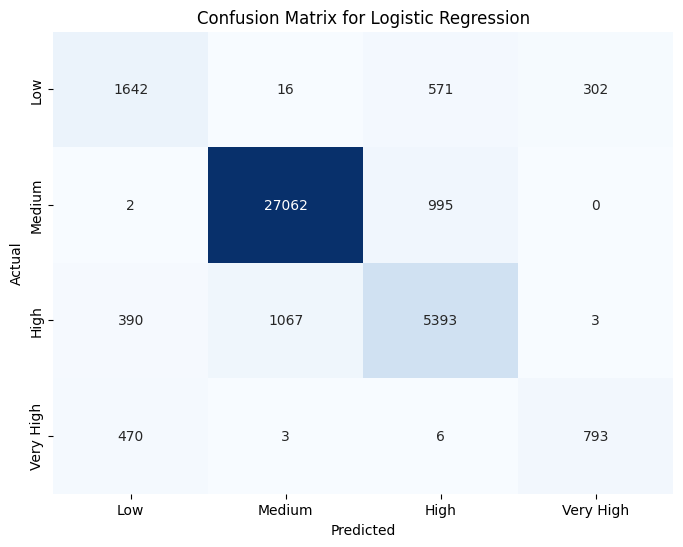

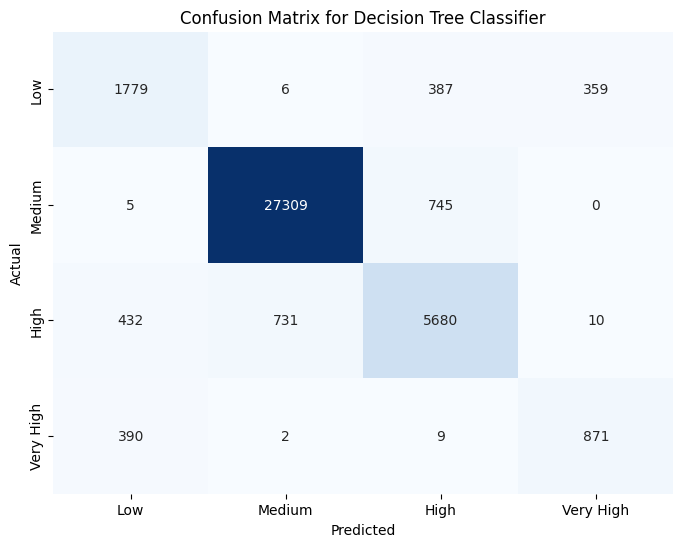

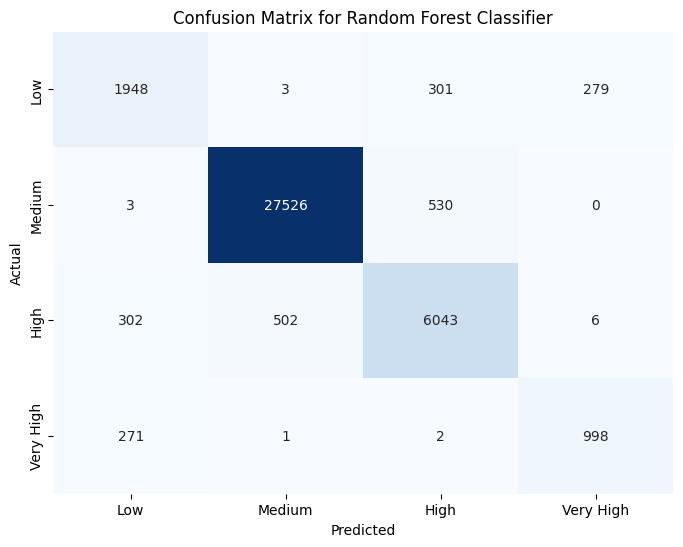

In [ ]:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Low', 'Medium', 'High', 'Very High'],
                yticklabels=['Low', 'Medium', 'High', 'Very High'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plotting confusion matrices for each model
plot_confusion_matrix(conf_matrix_lr, 'Logistic Regression')
plot_confusion_matrix(conf_matrix_dt, 'Decision Tree Classifier')
plot_confusion_matrix(conf_matrix_rf, 'Random Forest Classifier')

AND.... WE'RE DONE!

# ***THANK YOU FOR JOINING THIS SESSION WITH US!!!***

  SIGNING OFF
  
  ACM W

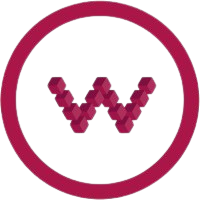